In [45]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import plasma, hsv
from scipy.io import loadmat

from noise_correlations.data import datasets

In [2]:
d = loadmat('kohn_pvc-11/stimuli_gratings/M_grating060.mat')

In [56]:
# data paths
fname = 'nc_datasets/R32_B7_MUAR_ext_rsp.h5'
with h5py.File(fname, 'r') as f:
    resp = f['final_rsp'].value
n_el, n_samples, n_freq, n_attn = resp.shape
Yp = np.transpose(resp[..., 5], axes=(0, 2, 1))
trial_medians = np.median(Yp, axis=-1)
keep = (trial_medians.max(axis=1) / trial_medians.min(axis=1)) >= 5.
Yp = Yp[keep]
bfs = np.median(Yp, axis=-1).argmax(axis=1)
idxs = np.argsort(bfs)
bfs = bfs[idxs]
Yp_fs = Yp[idxs]

In [4]:
# data paths
folder = 'kohn_pvc-11/'
ds = datasets.KohnCRCNSpvc11_monkey(folder)
Yp = ds.data_tensor()
trial_median = np.median(Yp, axis=-1)
keep = np.logical_and(trial_median.max(axis=-1) >= 15,
                      trial_median.max(axis=-1) >= 2.0 * trial_median.min(axis=-1))
Yp = Yp[keep]
bas = np.median(Yp, axis=-1).argmax(axis=1)
idxs = np.argsort(bas)
Yp_as = Yp[idxs]
bas = bas[idxs]

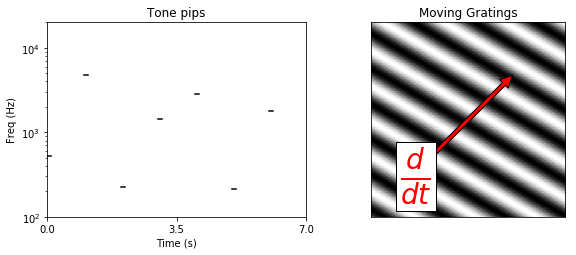

In [117]:
figsize=(9, 4)
f = plt.figure(figsize=figsize)

le = .1
be = .15
re = .1
hg = .1

w1 = .4
w2= 1. - le - re - hg - w1
h = w2 * figsize[0] / figsize[1]

ax0 = f.add_axes([le, be, w1, h])
ax1 = f.add_axes([le + w1 + hg, be, w2, h])


T = 7
ax0.set_title('Tone pips')
ax0.set_xlim(0, T)
ax0.set_xticks([0, T/2., T])
ax0.set_xlabel('Time (s)')

ax0.set_yscale('log')
ax0.set_ylim(1e2, 2e4)
ax0.set_xticks([0, T/2., T])
ax0.set_ylabel('Freq (Hz)')
for ii in range(T):
    f = np.power(10., np.random.uniform(low=np.log10(2e2), high=np.log10(1e4)))
    ax0.plot([ii, ii+.1], [f, f], c='k')

ax1.set_title('Moving Gratings')
ax1.imshow(d['M'][:, :, 0], cmap='gray', extent=[0, 1, 0, 1], aspect='equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.annotate('', xy=(.75, .75), xytext=(.3, .3),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center',
            verticalalignment='center',
            )
ax1.text(.15, .15, r'$\frac{d}{dt}$', color='red', size=40,
        bbox=dict(facecolor='white', edgecolor='black'))


plt.savefig('stimuli.pdf', dpi=300)

In [108]:
def plot_3(Y, X, axes, wrap=False, logspace=False):
    axa, axb, axc = axes
    if wrap:
        cm = hsv
    else:
        cm = plasma
    cm_locs = np.linspace(0, 1, Y.shape[1], endpoint=False)[np.newaxis]
    for ii in range(Y.shape[1]):
        axa.scatter(*Y[:, ii], s=1., c=cm(cm_locs[:, ii]))
        axb.scatter(np.tile(X[ii], Y.shape[-1]), Y[0, ii], s=1., c=cm(cm_locs[:, ii]))
        axc.scatter(Y[1, ii], np.tile(X[ii], Y.shape[-1]), s=1., c=cm(cm_locs[:, ii]))
    axa.plot(*Y.mean(axis=-1), c='k')
    if logspace:
        axb.set_xscale('log')
        axc.set_yscale('log')

    axb.plot(X, Y[0].mean(axis=-1), c='k')
    axc.plot(Y[1].mean(axis=-1), X, c='k')
    #axc.yaxis.tick_right()
    3axb.xaxis.tick_top()

(2, 30, 20)


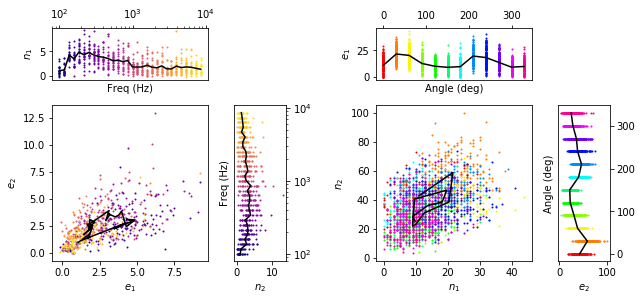

In [114]:
figsize=(9, 4)
f = plt.figure(figsize=figsize)

le = .075
te = .1
be = .15
re = .025
hg = .1

sub_w = (1. - le - re - hg) / 2.
sub_h = sub_w * figsize[0] / figsize[1]

inset_w = .6 * sub_w
inset_h = inset_w * figsize[0] / figsize[1]
inset_gap_w = .1 * sub_w
inset_gap_h = inset_gap_w * figsize[0] / figsize[1]
inset_small_w = (sub_w - inset_w - inset_gap)
inset_small_h = inset_small_w * figsize[0] / figsize[1]

ax2a = f.add_axes([le, be, inset_w, inset_h])
ax2b = f.add_axes([le, be + inset_h + inset_gap_h, inset_w, inset_small_h])
ax2c = f.add_axes([le + inset_w + inset_gap_w, be, inset_small_w, inset_h])

ax3a = f.add_axes([le + sub_w + hg, be, inset_w, inset_h])
ax3b = f.add_axes([le + sub_w + hg, be + inset_h + inset_gap_h, inset_w, inset_small_h])
ax3c = f.add_axes([le + sub_w + hg + inset_w + inset_gap_w, be, inset_small_w, inset_h])

Y = Yp_fs[[2, 12]]
print(Y.shape)
plot_3(Y, np.logspace(2, 4, Y.shape[1], endpoint=False), [ax2a, ax2b, ax2c], logspace=True)
ax2a.set_xlabel(r'$e_1$')
ax2a.set_ylabel(r'$e_2$')
ax2b.set_xlabel('Freq (Hz)')
ax2b.set_ylabel(r'$n_1$')
ax2c.set_xlabel(r'$n_2$')
ax2c.set_ylabel('Freq (Hz)')

Y = Yp_as[[0, 3]]
plot_3(Y, np.linspace(0, 360, Y.shape[1], endpoint=False), [ax3a, ax3b, ax3c], wrap=True)
ax3a.set_xlabel(r'$n_1$')
ax3a.set_ylabel(r'$n_2$')
ax3b.set_xlabel('Angle (deg)')
ax3b.set_ylabel(r'$e_1$')
ax3c.set_xlabel(r'$e_2$')
ax3c.set_ylabel('Angle (deg)')

plt.savefig('stimuli_response.pdf', dpi=300)